# Project : Productivity Prediction of Garment Employees

This project applies regression techniques to predict the productivity of employees in a garment manufacturing setting. 
Using a real-world dataset, I explore and prepare the data, assess its quality, and create informative visualizations to 
identify key patterns. The analysis focuses on modeling the relationships between variables influencing productivity, 
selecting and justifying appropriate regression models. Results are interpreted in light of statistical significance, 
and the study concludes with a discussion of limitations and potential improvements. 


Here is a reminder of the variables which will be useful for understanding the data:
* 01	date			:	Date in MM-DD-YYYY
* 02	day			:	Day of the Week
* 03	quarter			:	A portion of the month. A month was divided into four quarters
* 04	department		:	Associated department with the instance
* 05	team_no			:	Associated team number with the instance
* 06	no_of_workers		:	Number of workers in each team
* 07	no_of_style_change	:	Number of changes in the style of a particular product
* 08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
* 09	smv			:	Standard Minute Value, it is the allocated time for a task
* 10	wip			:	Work in progress. Includes the number of unfinished items for products
* 11	over_time		:	Represents the amount of overtime by each team in minutes
* 12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* 13	idle_time		:	The amount of time when the production was interrupted due to several reasons
* 14	idle_men		:	The number of workers who were idle due to production interruption
* 15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1


## 1. import libraries and load data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The data can be found here: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

In [2]:
df = pd.read_csv('data/garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## 2. Initial Data Exploration

In [4]:
df.shape

(1197, 15)

The dataset contains 1 197 rows and 15 variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We notice that the date is in object format but it should be put in time

## 3. Data cleaning 

In this section, we perform essential data quality checks to ensure our dataset is reliable and suitable for analysis. We examine several critical aspects:

1. **Missing Values Analysis**:
   - Identify and quantify null/missing values across all features
   - Implement appropriate handling based on missing data patterns

2. **Data Type Verification**:
   - Confirm each column matches its expected data type (numeric, categorical, datetime)
   - Convert misclassified types when necessary

3. **Descriptive Statistics Review**:
   - Validate statistical properties (min/max, mean, distribution) against domain knowledge
   - Detect potential data entry errors through outlier analysis

4. **Consistency Checks**:
   - Verify logical relationships between variables (e.g., overtime ≥ 0)
   - Ensure temporal consistency where applicable

5. **Duplicate Detection**:
   - Identify and handle duplicate records that may bias results

6. **Feature-Specific Validation**:
   - Cross-check productivity values against possible ranges (0-1 for percentage-based metrics)
   - Validate categorical variables against expected categories

We use visualization tools (histograms, boxplots) and statistical tests to systematically identify data quality issues before proceeding with analysis. This rigorous cleaning process ensures the integrity of our subsequent modeling efforts.

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [7]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [9]:
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [8]:
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'] = df['department'].str.replace('sweing','sewing')

In [10]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

We have 506 missing values for variable work in progress

WIP - Basic statistics:
count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: work_in_progress, dtype: float64


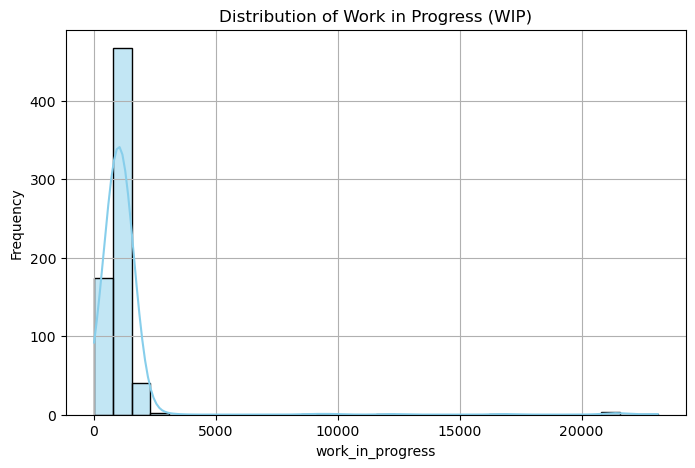

In [11]:
print("WIP - Basic statistics:")
print(df['work_in_progress'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df['work_in_progress'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Work in Progress (WIP)')
plt.xlabel('work_in_progress')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Since the wip variable is right-skewed and contains several extreme outliers, I chose to impute missing values using the median (1039.0) rather than the mean, to avoid distortion in the dataset.

In [12]:
df['work_in_progress'] = df['work_in_progress'].fillna(df['work_in_progress'].median())

In [13]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

A month was divided into 4 quarters. However, there is a 'Quarter5' value observed.

Also, under department spelling of sewing is wrong and finishing appears as a unique value twice due to whitespace.

In [14]:
#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5'].head(5)

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,2015-01-29,Quarter5,sewing,Thursday,2,0.8,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,2015-01-29,Quarter5,finishing,Thursday,4,0.8,4.30,1039.0,1200,0,0.0,0,0,10.0,0.989000
500,2015-01-29,Quarter5,sewing,Thursday,3,0.8,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,2015-01-29,Quarter5,sewing,Thursday,4,0.8,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,2015-01-29,Quarter5,sewing,Thursday,10,0.8,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130


It appears that quarter5 was assigned to days of the month above 28. Since January cannot be divided into equal 4 quarters, 29th and 31st will be assigned to quarter 4.

In [15]:
df['quarter'] = df.quarter.str.replace('Quarter5', 'Quarter4')

In [16]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

print(df.quarter.unique())
print(df.quarter.dtype)
     

[1 2 3 4]
int64


In [17]:
df.duplicated().sum()
# we have not duplicate

0

In [18]:
df.describe()

,date,quarter,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,2.362573,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,1.000000,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,2.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,3.000000,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,4.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,1.149612,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


"actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1"  We notice that it is slightly above 1. We will cap it at 1.

In [23]:
df['actual_productivity'] = df['actual_productivity'].clip(upper=1)
df['actual_productivity'].describe()

count    1197.000000
mean        0.734461
std         0.173380
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.000000
Name: actual_productivity, dtype: float64

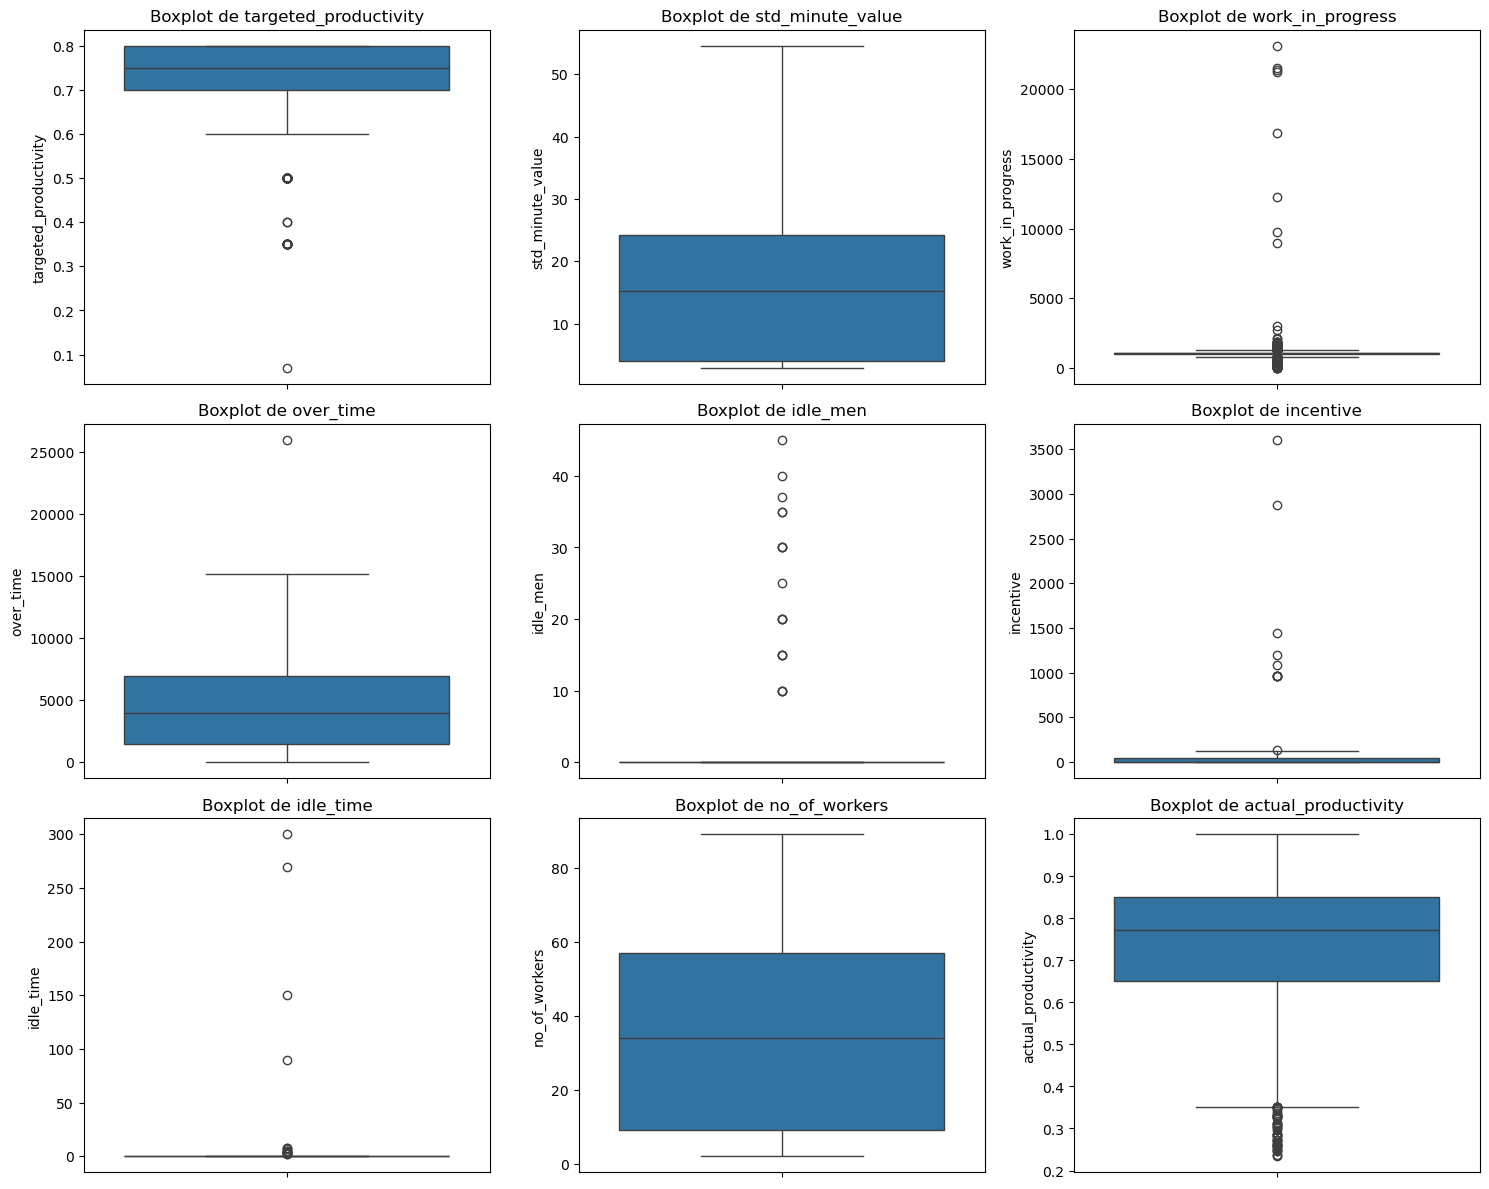

In [24]:
continuous = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

plt.figure(figsize=(15, 12))
for i, var in enumerate(continuous, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=var)
    plt.title(f"Boxplot de {var}")
    
plt.tight_layout()
plt.show()

Outliers were found in several columns (productivity, overtime, work progress, incentives, idle time, and idle workers). These were kept in the dataset as they reflect normal workflow variations between teams - some teams naturally perform much better or worse than average. Daily performance can also vary significantly for any given team.

In [25]:
#checking for anomalies

#None of the values in the continuous columns should be negative
for col in continuous:
  print(len(df[df[col] < 0]))
#none had values < 0 

0
0
0
0
0
0
0
0
0


In [27]:
#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))
df['no_of_workers'].unique()


array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6])

In [28]:
#saving cleaned data
df.to_csv('cleaned_productivity',index=False)

In [26]:
#checking for anomalies

#number of workers in each team should be a whole number
df['no_of_workers'].unique()

#there are some values with decimal points. 

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

## 4. univariate Analysis

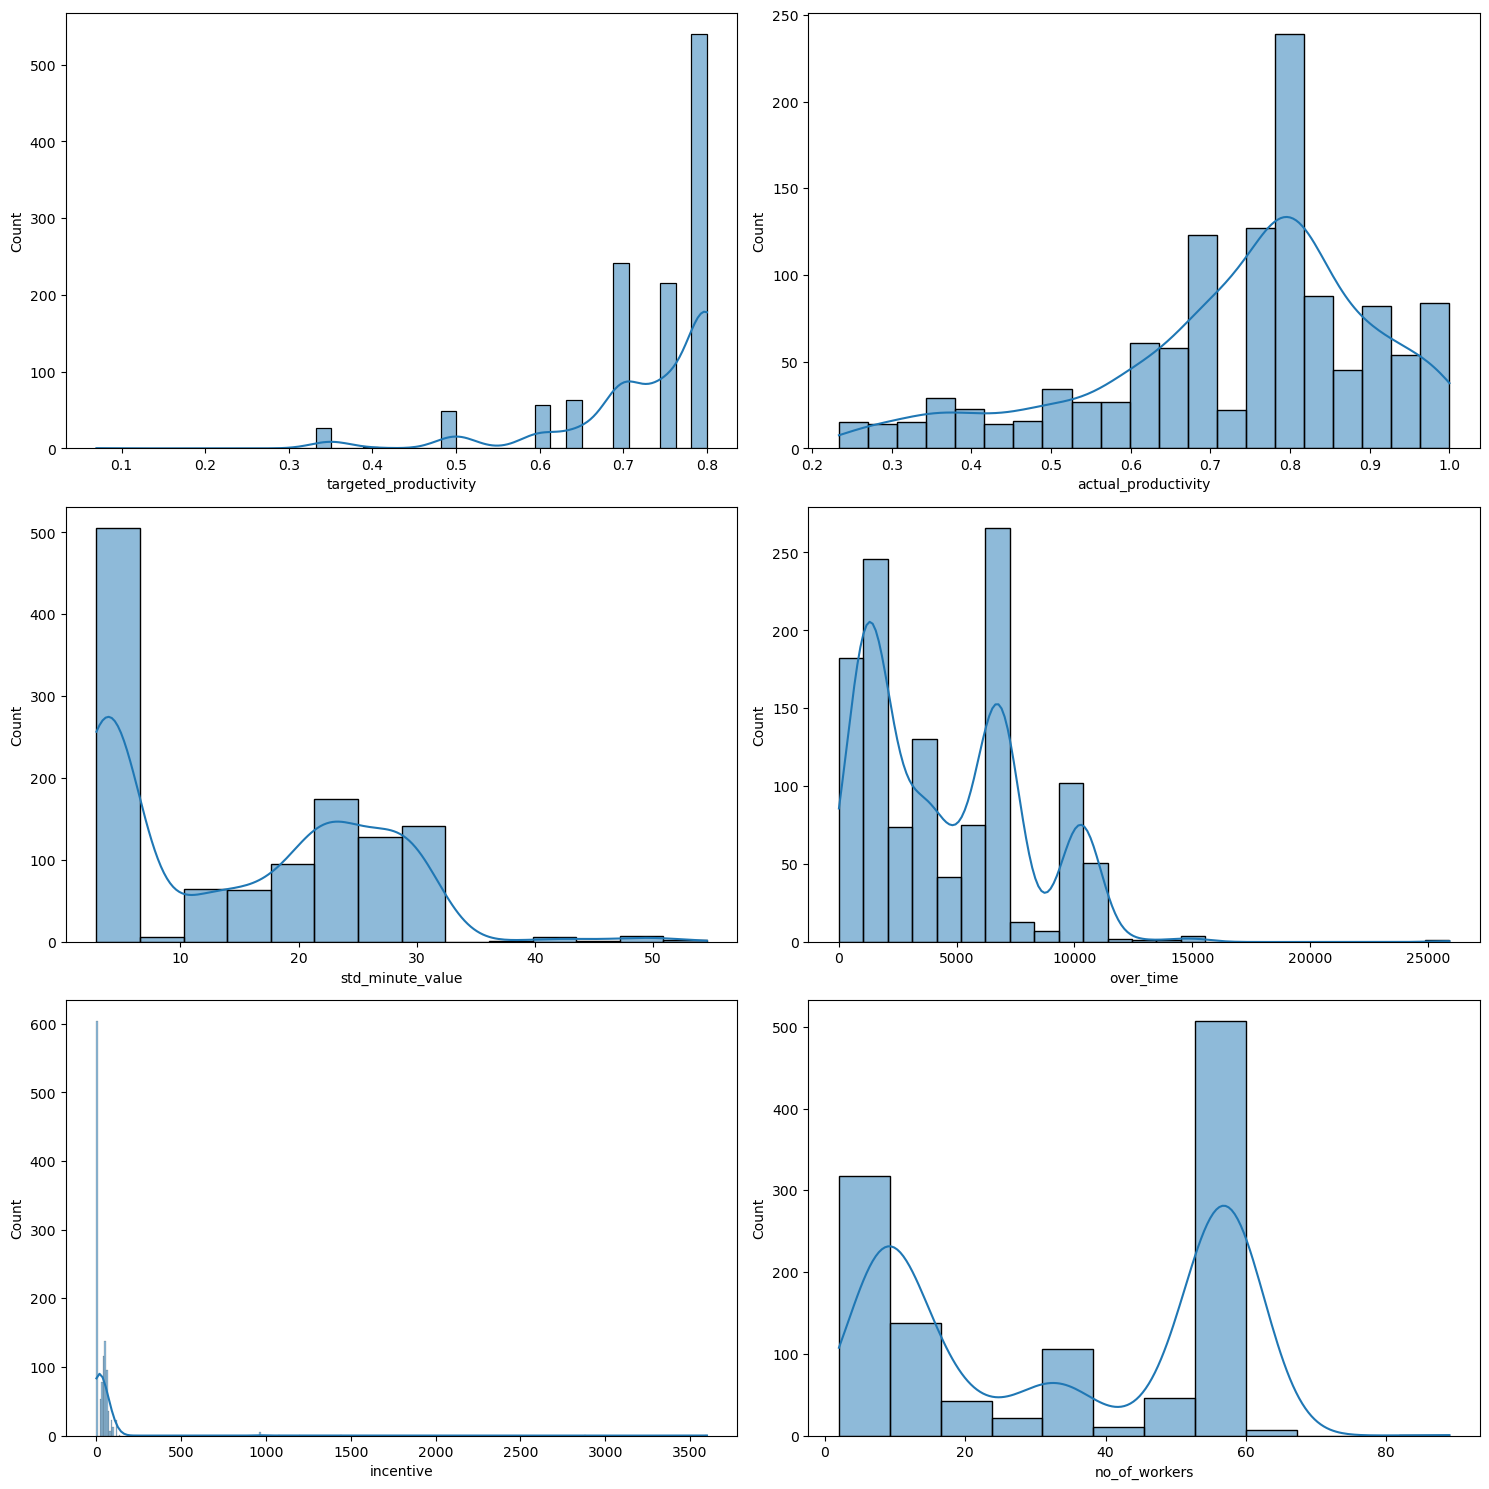

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['targeted_productivity'], ax=axes[0, 0], kde=True)
sns.histplot(df['actual_productivity'], ax=axes[0, 1], kde=True)
sns.histplot(df['std_minute_value'], ax=axes[1, 0], kde=True)
sns.histplot(df['over_time'], ax=axes[1, 1], kde=True)
sns.histplot(df['incentive'], ax=axes[2, 0], kde=True)
sns.histplot(df['no_of_workers'], ax=axes[2, 1], kde=True)
plt.tight_layout()
plt.show()

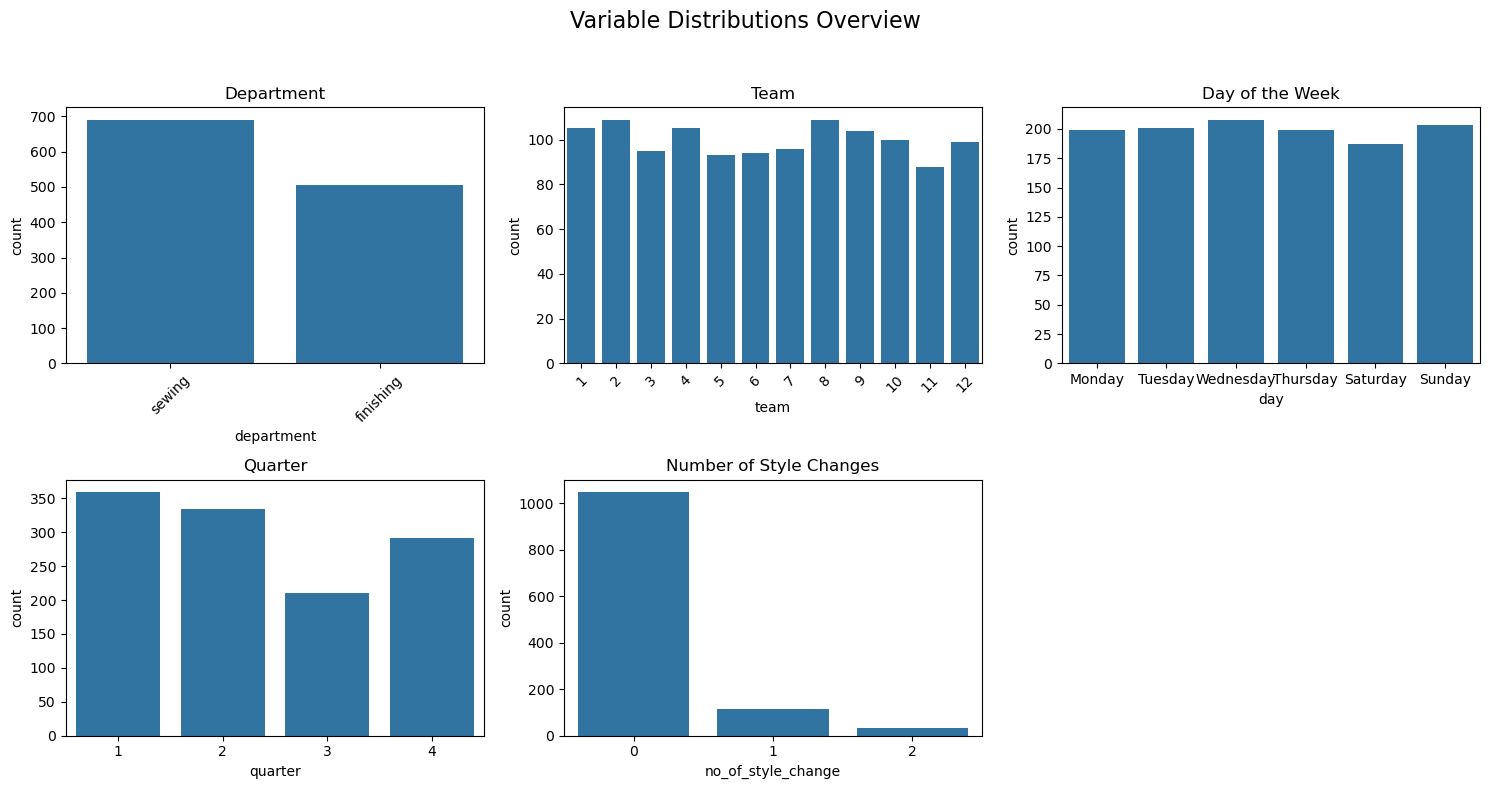

In [30]:
# Create 2x3 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Variable Distributions Overview', fontsize=16)

# 1. Department distribution
sns.countplot(data=df, x='department', ax=axes[0, 0])
axes[0, 0].set_title('Department')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Team distribution
sns.countplot(data=df, x='team', ax=axes[0, 1])
axes[0, 1].set_title('Team')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Day of the week distribution
sns.countplot(data=df, x='day', order = ['Monday','Tuesday', 'Wednesday','Thursday','Saturday','Sunday'],ax=axes[0, 2])
axes[0, 2].set_title('Day of the Week')

# 4. Quarter distribution
sns.countplot(data=df, x='quarter', ax=axes[1, 0])
axes[1, 0].set_title('Quarter')

# 5. Number of style changes
sns.countplot(data=df, x='no_of_style_change', ax=axes[1, 1])
axes[1, 1].set_title('Number of Style Changes')

# 6. Empty plot (or replace with another variable if needed)
axes[1, 2].axis('off')
# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

Observations:

* Quarter 1 had the most records in the dataset.
* There were more records related to the sewing department than the finishing department.
* The day of the week with the most records is Wednesday.
* Teams 2 and 8 appeared more frequently than other teams in the dataset.
* For most records, the number of changes in the style of a particular product was 0.

## 5. Bivariate Analysis

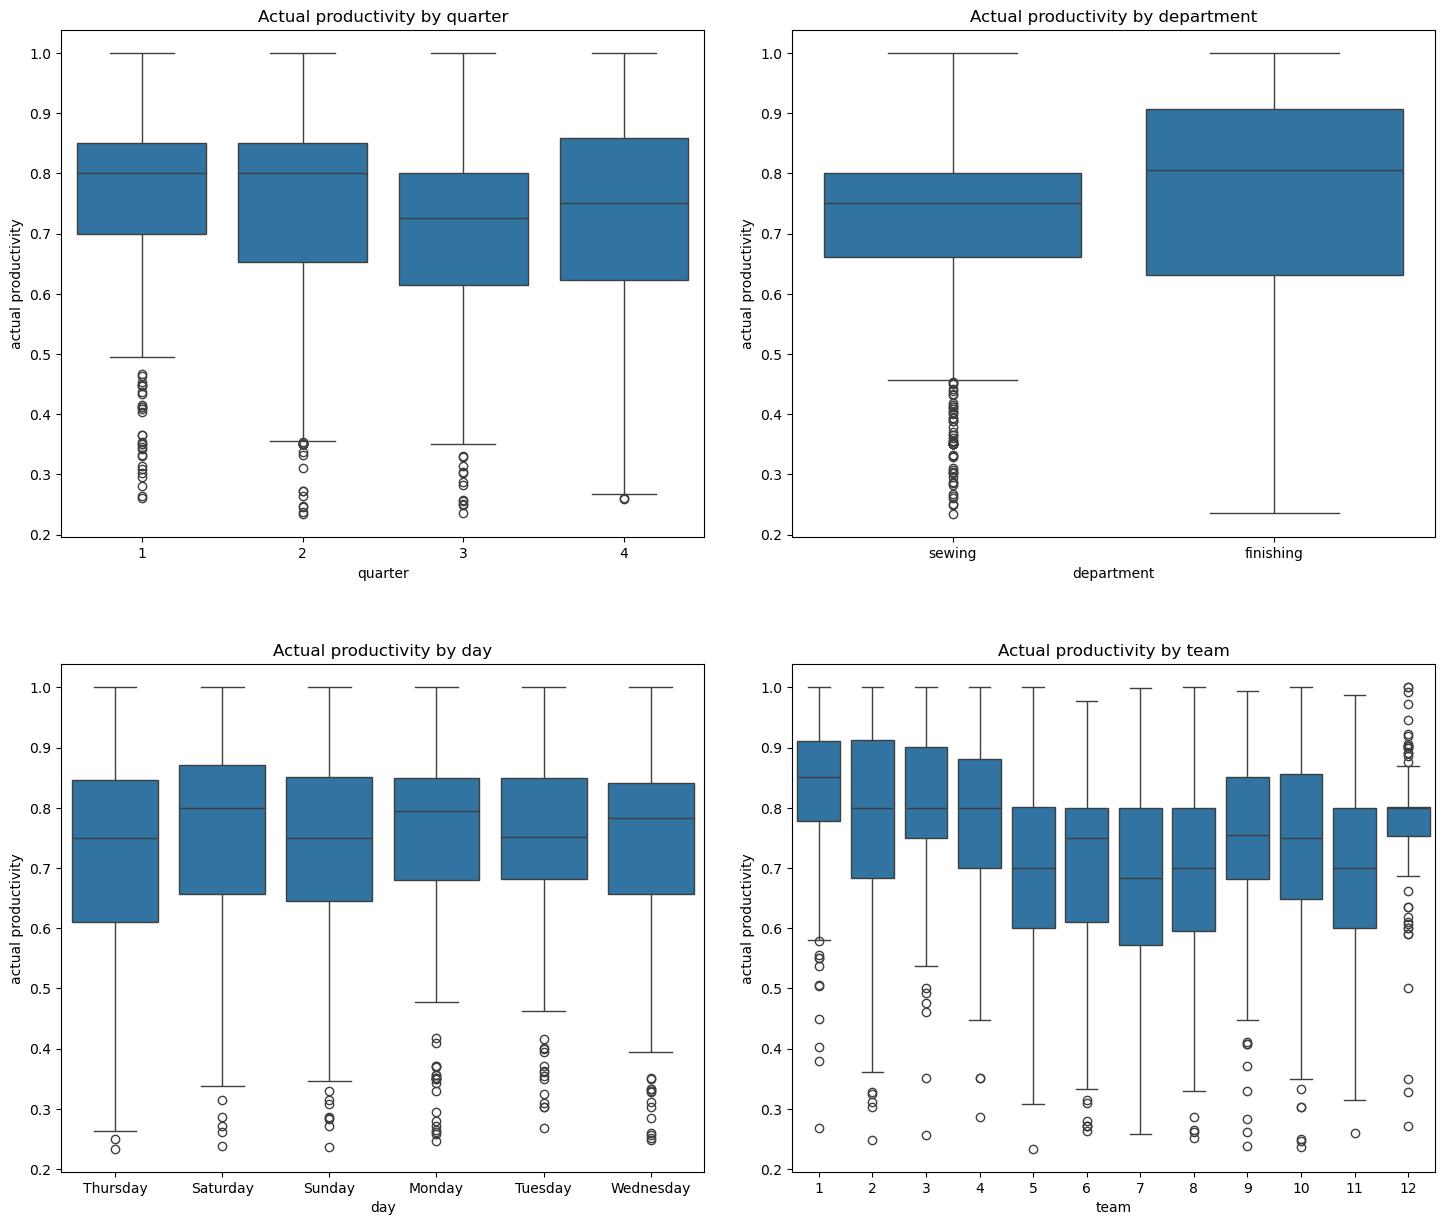

In [31]:
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data=df, x=cat[i], y='actual_productivity', ax=ax)
    ax.set_title(f"Actual productivity by {cat[i]}")
    ax.set_xlabel(cat[i])
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()
     

Observations:

The median actual productivity is highest:

* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays

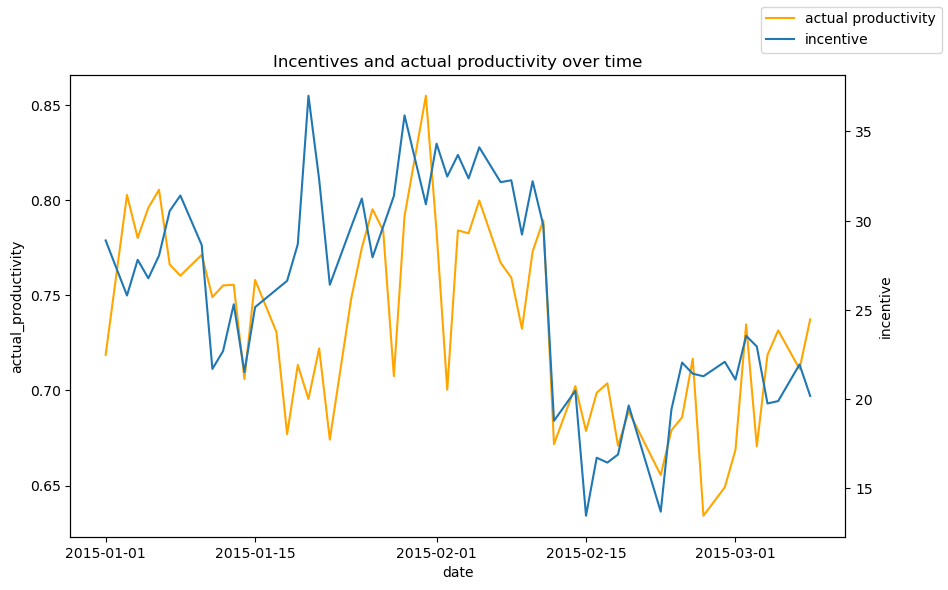

In [32]:
#examining trend of actual productivity and incentives
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
df_dt
plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt,errorbar=None , color ='orange', legend=False, label = 'actual productivity' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, errorbar=None,ax=ax2, legend=False, label = 'incentive')

line1.figure.legend()

plt.title("Incentives and actual productivity over time")
plt.show();

Incentives and actual productivity show similar trends, with periods of low incentives generally coinciding with periods of low actual productivity, and peaks in productivity generally coinciding with peaks in incentives.

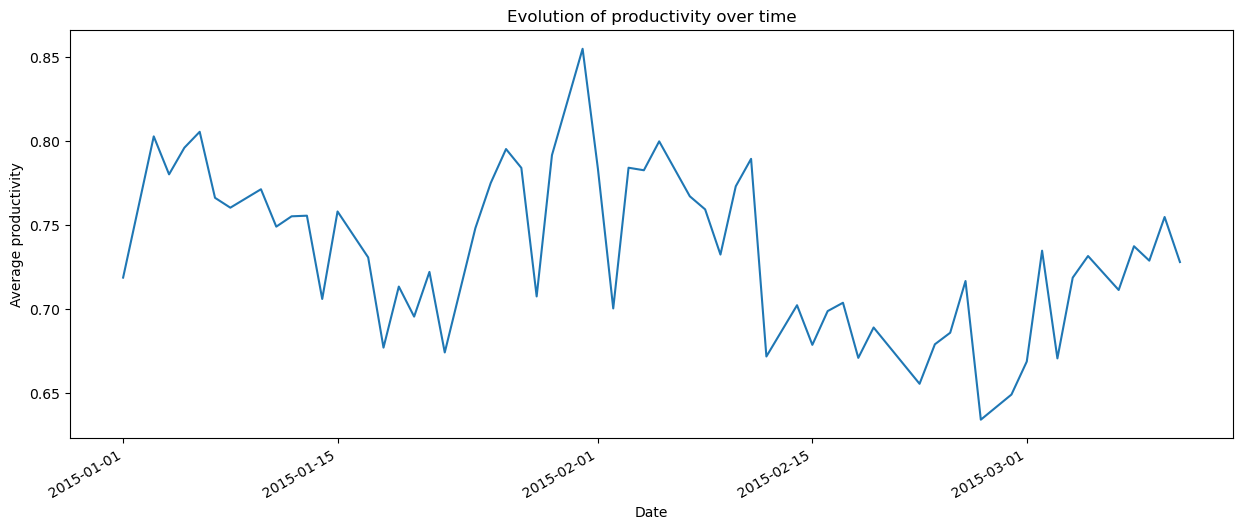

In [33]:
plt.figure(figsize=(15,6))
df.groupby('date')['actual_productivity'].mean().plot()
plt.title('Evolution of productivity over time')
plt.ylabel('Average productivity')
plt.xlabel('Date')
plt.show()

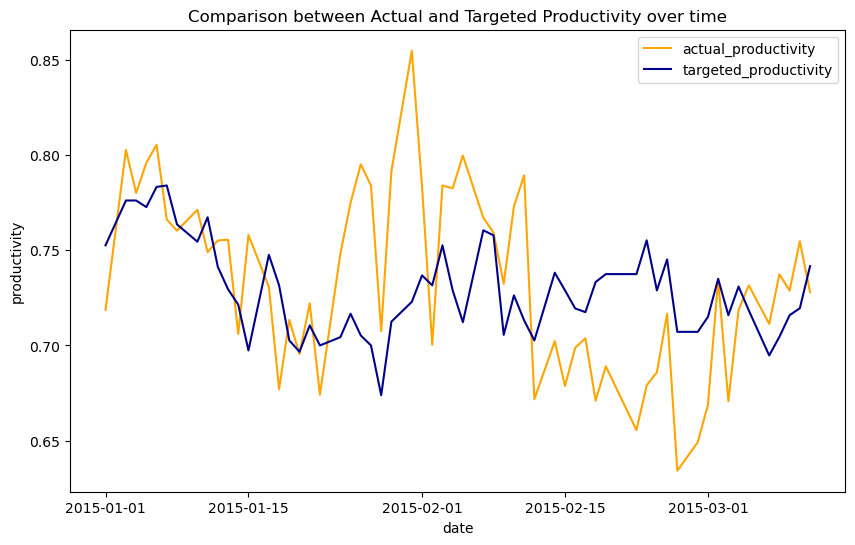

In [34]:
# Line plot to check actual and targeted productivity
plt.figure(figsize=(10,6))

sns.lineplot(x='date', y='actual_productivity', data=df,errorbar=None, color='orange' )
sns.lineplot(x='date', y='targeted_productivity', data=df,errorbar=None, color='darkblue')

plt.legend(labels=['actual_productivity','targeted_productivity'])
plt.ylabel("productivity")
plt.title("Comparison between Actual and Targeted Productivity over time")
plt.show()

Actual productivity generally exceeded targeted productivity except from mid February to beginning of March where targets were not being met.

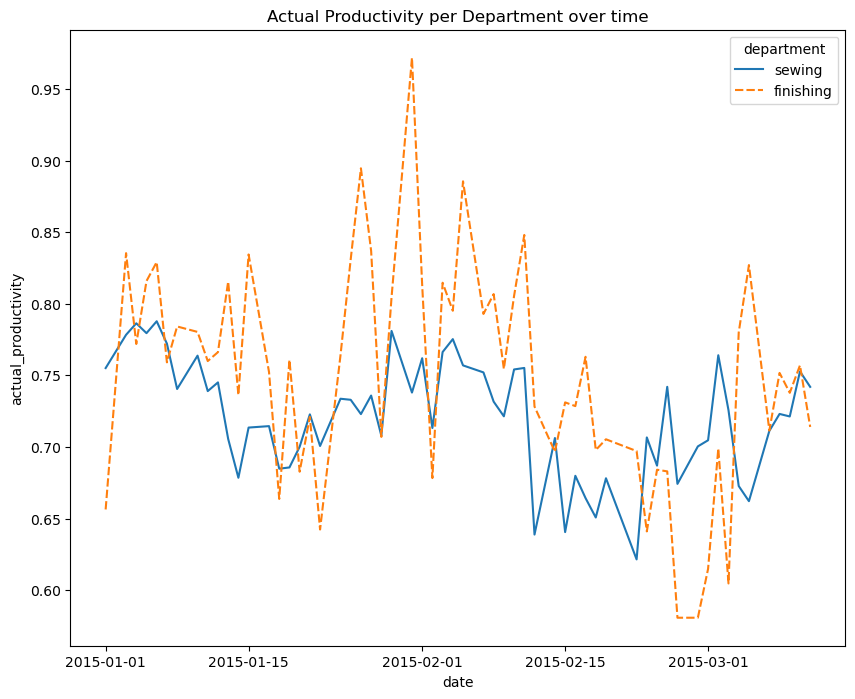

In [35]:
# Line plot to check actual productivity vs department
plt.figure(figsize=(10,8))

sns.lineplot(x='date', y='actual_productivity', hue = 'department',errorbar=None, style= 'department', data=df)
plt.title("Actual Productivity per Department over time")
plt.show()

The finishing department generally had higher actual productivity than the sewing department.

In [36]:
df[df.department == 'sewing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
7     sewing        27.109091
5     sewing        29.137931
8     sewing        31.285714
Name: incentive, dtype: float64

Teams 7, 5, and 8 (lowest performing in sewing) have the lowest average incentive in sewing

In [37]:
df[df.department == 'finishing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
6     finishing      0.000000
7     finishing      0.000000
8     finishing     18.113208
Name: incentive, dtype: float64

Teams 6, 7, and 8 (lowest performing in finishing) have the lowest average incentive in finishing

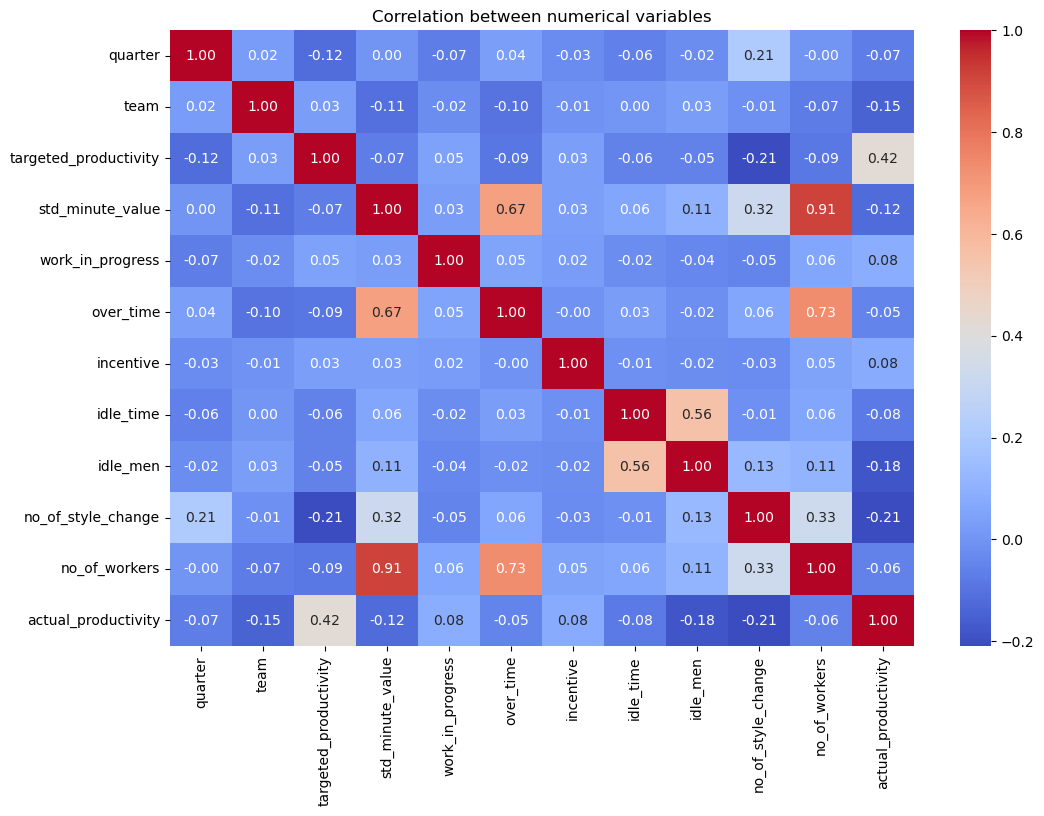

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numerical variables")
plt.show()

Number of workers (no_of_workers) and std_minute_value: Correlation of 0.91 – A near-linear relationship suggests that headcount directly influences the time allocated to tasks, or vice versa.
Overtime (over_time) and std_minute_value: Correlation of 0.67 – Indicates that delays or poor time estimation lead to overtime.
Idle_men and idle_time: Correlation of 0.56 – Stops are synchronized, pointing to logistical bottlenecks.

## 6. regression model

#### formulation of hypotheses :
Actual Productivity Distribution: Actual productivity appears to be normally distributed, which is a good indication for using linear regression models.

Relationships Between Variables:

* Targeted Productivity vs. Actual Productivity: There appears to be a positive relationship between targeted productivity and actual productivity.
* Number of Workers vs. Actual Productivity: There is a concentration of points at certain worker levels, which could indicate threshold effects or capacity limitations.
* Overtime vs. Actual Productivity: Overtime appears to have a complex relationship with actual productivity.
* Incentives vs. Actual Productivity: Incentives show a positive relationship with actual productivity.

- **Dependent Variable:** Actual Productivity
- **Independent Variables:** Department, Team, Targeted Productivity, SMV, WIP, Overtime, Idle Time, Idle Men, Number of Style Change and Number of Workers

In [39]:
import statsmodels.api as sm 
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf

In [40]:
#checking for columns with object datatype
for col in cat:
  if df[col].dtype == "object":
    print(col)

department
day


In [41]:
#creating a copy of the dataframe
df_enc = df.copy()

In [42]:
#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})

/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_4717/653785054.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc['day'] = df_enc['day'].replace(repl_dict)
/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_4717/653785054.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})


In [43]:
# checking that the values were encoded
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]
[3 4 5 0 1 2]


In [44]:
df_enc.drop(columns=['date','quarter','day'], inplace=True, axis=1)

print(df_enc.columns)

Index(['department', 'team', 'targeted_productivity', 'std_minute_value',
       'work_in_progress', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [45]:
multi_model = smf.ols(
    formula='actual_productivity ~ department + team + targeted_productivity + work_in_progress + over_time + incentive + idle_time + idle_men + no_of_style_change + no_of_workers',
    data=df_enc
)
multi_result = multi_model.fit()
multi_result.params


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intercept                0.185042
department               0.076205
team                    -0.006686
targeted_productivity    0.692831
work_in_progress         0.000006
over_time               -0.000005
incentive                0.000055
idle_time                0.000440
idle_men                -0.008913
no_of_style_change      -0.050914
no_of_workers            0.002292
dtype: float64

In [46]:
multi_result.rsquared

0.2537103064654641

* targeted_productivity (0.70): An increase in target productivity is strongly associated with an increase in actual productivity.

* no_of_workers (0.0023): Each additional worker slightly increases productivity.

* no_of_style_change (-0.05): Style changes reduce productivity.

* department (0.08): Department has a positive impact on productivity.

These factors are the most influential on actual productivity according to the regression coefficients.

In [47]:
multi_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.254
Model:                             OLS   Adj. R-squared:                  0.247
Method:                  Least Squares   F-statistic:                     40.32
Date:                 Thu, 08 May 2025   Prob (F-statistic):           9.54e-69
Time:                         18:08:28   Log-Likelihood:                 574.64
No. Observations:                 1197   AIC:                            -1127.
Df Residuals:                     1186   BIC:                            -1071.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1850      0.049      3.738      0.000       0.088       0.282
department                0.0762      0.027      2.838      0.005       0.024       0.129
team                     -0.0067      0.001     -5.059      0.000      -0.009      -0.004
targeted_productivity     0.6928      0.046     15.124      0.000       0.603       0.783
work_in_progress       5.934e-06   3.13e-06      1.894      0.058   -2.12e-07    1.21e-05
over_time             -4.969e-06   2.03e-06     -2.450      0.014   -8.95e-06   -9.89e-07
incentive               5.51e-05   2.73e-05      2.017      0.044     1.5e-06       0.000
idle_time                 0.0004      0.000      1.057      0.291      -0.000       0.001
idle_men                 -0.0089      0.002     -5.420      0.000      -0.012      -0.006
no_of_style_change       -0.0509      0.012     -4.384      0.000      -0.074      -0.028
no_of_workers             0.0023      0.001      3.451      0.001       0.001       0.004
==============================================================================
Omnibus:                      152.035   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.542
Skew:                          -0.822   Prob(JB):                     3.59e-58
Kurtosis:                       4.613   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7. Interpretation of Multiple Linear Regression Results

We formulated several hypotheses about the relationships between predictor variables and the target variable `actual_productivity`. The estimated multiple linear regression model allows us to confirm or refute these hypotheses based on the estimated coefficients and their statistical significance.

### Hypothesis 1 – Targeted Productivity

**Hypothesis**: There is a positive relationship between targeted productivity (`targeted_productivity`) and actual productivity (`actual_productivity`).

**Result**:
- Coefficient: `+0.6950`
- p-value: `< 0.0001`

**Interpretation**: The effect is positive and highly significant. This confirms that higher targeted productivity is associated with higher actual productivity.

### Hypothesis 2 – Number of Workers

**Hypothesis**: The number of workers (`no_of_workers`) directly influences actual productivity, potentially with threshold or capacity effects.

**Result**:
- Coefficient: `+0.0023`
- p-value: `0.001`

**Interpretation**: The effect is positive and significant. This confirms that a larger workforce is associated with slightly higher productivity.

### Hypothesis 3 – Overtime

**Hypothesis**: Overtime hours (`over_time`) have a complex relationship with actual productivity.

**Result**:
- Coefficient: `−5.19e-06`
- p-value: `0.011`

**Interpretation**: The effect is significant but negative. This suggests that more overtime is associated with lower productivity, possibly due to poor planning, team fatigue, or structural inefficiencies.

### Hypothesis 4 – Incentives

**Hypothesis**: Financial incentives (`incentive`) have a positive effect on actual productivity.

**Result**:
- Coefficient: `+5.46e-05`
- p-value: `0.047`

**Interpretation**: The effect is positive and significant at 5%. This suggests that increasing financial incentives is associated with a slight improvement in productivity.

### Conclusion

The regression model confirms most of the hypotheses, particularly the positive effects of targeted productivity, number of workers, and financial incentives. However, the significant negative effect of overtime highlights the complexity of its impact on actual performance.


## 8. Limitations and perspectives

However, this linear regression analysis has limitations due to multicollinearity issues between some predictors (as seen in the correlation matrix). To address this, we could:

1. Apply regularization techniques using scikit-learn:
   - **Ridge Regression** to handle multicollinearity while keeping all features
   - **Lasso Regression** for feature selection
   - **Elastic Net** for balanced feature handling

2. Compare multiple models using cross-validation to identify the best performing approach.

3. Consider dimensionality reduction techniques like PCA if multicollinearity remains problematic.

The current results should be interpreted with caution, and next steps should focus on building more robust models that account for these data challenges.